In [1]:
import os
import cv2
#import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
#import moviepy
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

2024-03-23 02:29:41.353199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 02:29:41.353384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 02:29:41.547334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
model = tf.keras.saving.load_model('/kaggle/input/yolo-model')

In [4]:
model.save('Yolo_fusion.hdf5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 16
DATASET_DIR = "/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset"
CLASSES_LIST = os.listdir('/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset')

In [12]:
print(CLASSES_LIST)

['NonViolence', 'Violence']


In [13]:
NUM_CLASSES = len(CLASSES_LIST)
print(NUM_CLASSES)

2


In [5]:
def frames_extraction(video_path):
    '''This function will extract the required frames from a video after resizing and normalizing them.'''
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list

In [7]:
def create_dataset():
    features = []
    labels = []
    video_files_paths = []
    yolo_features = []
    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            frames = frames_extraction(video_file_path)
            
            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
    features = np.asarray(features)
    labels = np.array(labels)
    return features, labels, video_files_paths

In [8]:
features, labels, video_files_paths = create_dataset()
'''np.save('saved_features',features)
np.save('saved_labels',labels)
np.save('saved_video_files_paths',video_files_paths)'''

Extracting Data of Class: NonViolence


[h264 @ 0x5ade79c79c00] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5ade79c79c00] error while decoding MB 98 31
[h264 @ 0x5ade79c79c00] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5ade79c79c00] error while decoding MB 98 31
[h264 @ 0x5ade79c79c00] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5ade79c79c00] error while decoding MB 98 31
[h264 @ 0x5ade79c79c00] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5ade79c79c00] error while decoding MB 98 31


Extracting Data of Class: Violence


"np.save('saved_features',features)\nnp.save('saved_labels',labels)\nnp.save('saved_video_files_paths',video_files_paths)"

In [9]:
one_hot_encoded_labels = to_categorical(labels)

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True)

'''np.save('features_train',features_train)
np.save('features_test',features_test)
np.save('saved_labels_train',labels_train)
np.save('saved_labels_test',labels_test)'''

"np.save('features_train',features_train)\nnp.save('features_test',features_test)\nnp.save('saved_labels_train',labels_train)\nnp.save('saved_labels_test',labels_test)"

In [7]:
features_train = np.load('/kaggle/input/violenec-dataset/features_train.npy')
features_test = np.load('/kaggle/input/violenec-dataset/features_test.npy')
labels_train = np.load('/kaggle/input/violenec-dataset/saved_labels_train.npy')
labels_test = np.load('/kaggle/input/violenec-dataset/saved_labels_test.npy')

In [20]:
from IPython.display import FileLink
!apt install unzip
!zip -r file.zip /kaggle/working
FileLink(r'file.zip')
%cd /kaggle/working

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/test_videos/ (stored 0%)
  adding: kaggle/working/test_videos/Output-Test-Video.mp4 (deflated 47%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/saved_labels_test.npy (deflated 93%)
  adding: kaggle/working/saved_labels_train.npy (deflated 95%)
  adding: kaggle/working/features_train.npy (deflated 85%)
  adding: kaggle/working/features_test.npy (deflated 85%)
/kaggle/working


In [22]:
%cd /kaggle/working

/kaggle/working


In [23]:
FileLink(r'file.zip')

/kaggle/working/file.zip

In [2]:
import keras_cv
import keras_core as keras
from tensorflow.keras import layers, models

Using TensorFlow backend


In [3]:
from keras.layers import TimeDistributed,Conv2D,MaxPooling2D,Flatten,Dropout

In [33]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2( include_top=False , weights="imagenet")
mobilenet.trainable=True

for layer in mobilenet.layers[:-40]:
    layer.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [34]:
def create_model():
 
    model = Sequential()  
    model.add(Input(shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(mobilenet))
    model.add(Dropout(0.25))
    model.add(TimeDistributed(Flatten()))
    lstm_fw = LSTM(units=32)
    lstm_bw = LSTM(units=32, go_backwards = True)  
    model.add(Bidirectional(lstm_fw, backward_layer = lstm_bw))
    model.add(Dropout(0.25))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
    model.summary()
    return model

In [35]:
MoBiLSTM_model = create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDi  (None, 16, 2, 2, 1280)    2257984   
 stributed)                                                      
                                                                 
 dropout_5 (Dropout)         (None, 16, 2, 2, 1280)    0         
                                                                 
 time_distributed_3 (TimeDi  (None, 16, 5120)          0         
 stributed)                                                      
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                1319168   
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [36]:
MoBiLSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
training_history = MoBiLSTM_model.fit(x =  features_train, y = labels_train, epochs = 50, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2)

Epoch 1/50
300/300 [==============================] - 25s 38ms/step - loss: 0.6816 - accuracy: 0.5725 - val_loss: 0.8028 - val_accuracy: 0.5533
Epoch 2/50
300/300 [==============================] - 9s 31ms/step - loss: 0.5778 - accuracy: 0.7300 - val_loss: 0.5638 - val_accuracy: 0.7300
Epoch 3/50
300/300 [==============================] - 9s 30ms/step - loss: 0.5315 - accuracy: 0.7550 - val_loss: 0.6152 - val_accuracy: 0.6433
Epoch 4/50
300/300 [==============================] - 9s 31ms/step - loss: 0.5142 - accuracy: 0.7692 - val_loss: 0.5390 - val_accuracy: 0.7400
Epoch 5/50
300/300 [==============================] - 9s 31ms/step - loss: 0.4479 - accuracy: 0.8158 - val_loss: 0.6019 - val_accuracy: 0.6900
Epoch 6/50
300/300 [==============================] - 9s 31ms/step - loss: 0.4192 - accuracy: 0.8425 - val_loss: 0.5077 - val_accuracy: 0.7300
Epoch 7/50
300/300 [==============================] - 9s 30ms/step - loss: 0.3321 - accuracy: 0.8750 - val_loss: 0.4767 - val_accuracy: 0.770

In [17]:
MoBiLSTM_model.evaluate(features_test,labels_test)

16/16 [==============================] - 4s 99ms/step - loss: 0.4365 - accuracy: 0.9120


[0.43650177121162415, 0.9120000004768372]

In [4]:
def yolov4(input_shape=(64, 64, 3), num_classes=2):
    yolo_model = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_m_backbone_coco"
)
    yolo_model = models.Model(inputs=yolo_model.input, outputs=yolo_model.output)
    
    yolo_model.trainable=True

    '''for layer in yolo_model.layers[:-20]:
        layer.trainable=True'''

    return yolo_model

input_shape_yolo = (64, 64, 3)
yolo_model = yolov4(input_shape=input_shape_yolo)


Attaching 'config.json' from model 'keras/yolov8/keras/yolo_v8_m_backbone_coco/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/yolov8/keras/yolo_v8_m_backbone_coco/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/yolov8/keras/yolo_v8_m_backbone_coco/2' to your Kaggle notebook...
/opt/conda/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/opt/conda/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [5]:
yolo_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 stem_1_pad (ZeroPadding2D)  (None, None, None, 3)        0         ['rescaling[0][0]']           
                                                                                                  
 stem_1_conv (Conv2D)        (None, None, None, 48)       1296      ['stem_1_pad[0][0]']          
                                                                                              

In [20]:
def create_model():
 
    model = Sequential()  
    model.add(Input(shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(yolo_model))
    model.add(TimeDistributed(Flatten()))
    lstm_fw = LSTM(units=64)
    lstm_bw = LSTM(units=64, go_backwards = True)  
    model.add(Bidirectional(lstm_fw, backward_layer = lstm_bw))
    model.add(Dropout(0.25))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
    model.summary()
    return model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TimeDistributed, LSTM, Bidirectional, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
def create_model():
    model = Sequential()  
    model.add(Input(shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(yolo_model))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(units=32, return_sequences=True)))  # Reduced LSTM units
    model.add(Dropout(0.5))  # Increased dropout
    model.add(TimeDistributed(Dense(64, activation='relu', kernel_regularizer=l2(0.01))))  # Added L2 regularization
    model.add(Flatten())  # Flatten before dense layers
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())  # Added batch normalization
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    model.summary()
    return model

In [15]:
yolo_fusion = create_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDi  (None, 16, 2, 2, 576)     11872464  
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 16, 2304)          0         
 stributed)                                                      
                                                                 
 bidirectional_1 (Bidirecti  (None, 16, 64)            598272    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 16, 64)            0         
                                                                 
 time_distributed_5 (TimeDi  (None, 16, 64)            4160      
 stributed)                                           

In [22]:
yolo_fusion.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
training_history_yolo = yolo_fusion.fit(x =  features_train, y = labels_train, epochs = 50, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.3)

Epoch 1/50


I0000 00:00:1708948559.083260     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 [==============================] - 38s 123ms/step - loss: 0.6880 - accuracy: 0.5371 - val_loss: 0.6819 - val_accuracy: 0.5578
Epoch 2/50
132/132 [==============================] - 11s 86ms/step - loss: 0.6355 - accuracy: 0.6324 - val_loss: 0.7815 - val_accuracy: 0.4733
Epoch 3/50
132/132 [==============================] - 11s 86ms/step - loss: 0.5541 - accuracy: 0.7324 - val_loss: 0.9310 - val_accuracy: 0.4844
Epoch 4/50
132/132 [==============================] - 11s 86ms/step - loss: 0.4947 - accuracy: 0.7838 - val_loss: 1.1338 - val_accuracy: 0.4733
Epoch 5/50
132/132 [==============================] - 11s 86ms/step - loss: 0.4823 - accuracy: 0.7714 - val_loss: 0.6851 - val_accuracy: 0.5222
Epoch 6/50
132/132 [==============================] - 11s 86ms/step - loss: 0.4191 - accuracy: 0.8210 - val_loss: 1.3675 - val_accuracy: 0.4733
Epoch 7/50
132/132 [==============================] - 11s 86ms/step - loss: 0.3241 - accuracy: 0.8638 - val_loss: 0.6918 - val_accuracy: 0.5800
Ep

In [30]:
training_history_yolo = yolo_fusion.fit(x =  features_train, y = labels_train, epochs = 50, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.3)

Epoch 1/50


I0000 00:00:1708096413.203406    8106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 [==============================] - 26s 76ms/step - loss: 0.6854 - accuracy: 0.5581 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 2/50
132/132 [==============================] - 6s 47ms/step - loss: 0.6233 - accuracy: 0.6724 - val_loss: 0.6727 - val_accuracy: 0.5667
Epoch 3/50
132/132 [==============================] - 6s 47ms/step - loss: 0.5493 - accuracy: 0.7457 - val_loss: 1.0679 - val_accuracy: 0.5200
Epoch 4/50
132/132 [==============================] - 6s 47ms/step - loss: 0.4961 - accuracy: 0.7781 - val_loss: 0.9056 - val_accuracy: 0.5178
Epoch 5/50
132/132 [==============================] - 6s 47ms/step - loss: 0.4332 - accuracy: 0.8210 - val_loss: 0.6188 - val_accuracy: 0.6689
Epoch 6/50
132/132 [==============================] - 6s 47ms/step - loss: 0.3958 - accuracy: 0.8486 - val_loss: 1.2863 - val_accuracy: 0.4933
Epoch 7/50
132/132 [==============================] - 6s 47ms/step - loss: 0.3642 - accuracy: 0.8533 - val_loss: 0.8764 - val_accuracy: 0.5356
Epoch 8/5

In [16]:
model.evaluate(features_test,labels_test)

16/16 [==============================] - 7s 139ms/step - loss: 0.1488 - accuracy: 0.9640


[0.14879657328128815, 0.9639999866485596]

In [17]:
yolo_fusion.save('yolo_model')

In [6]:
from tensorflow.keras.models import load_model

In [7]:
yolo_fusion = load_model('/kaggle/input/yolo-model')

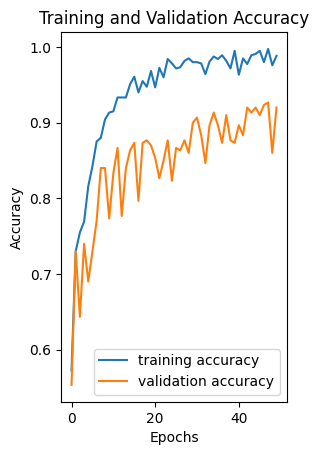

In [38]:
plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.plot(training_history.history['accuracy'], label="training accuracy")
plt.plot(training_history.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.show()

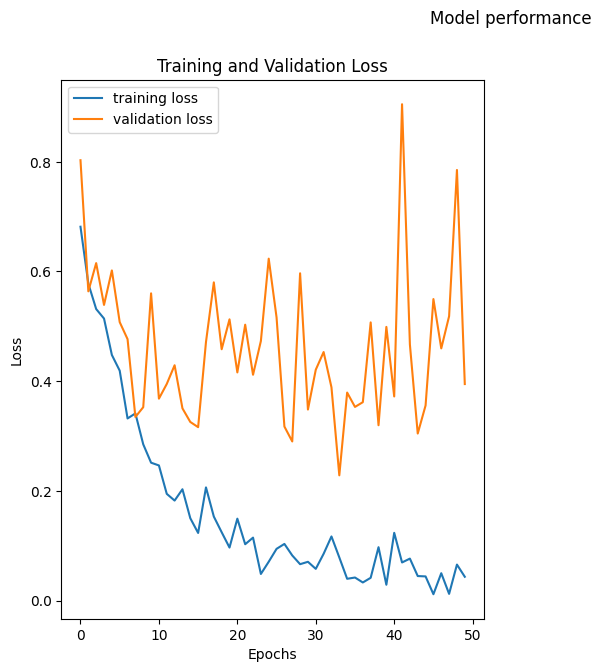

In [39]:
plt.figure(figsize=(12,7))
plt.suptitle("Model performance")

plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.plot(training_history.history["loss"], label="training loss")
plt.plot(training_history.history["val_loss"], label="validation loss")
plt.legend()

In [25]:
labels_predict = yolo_fusion.predict(features_test)

16/16 [==============================] - 1s 65ms/step


In [26]:
labels_predict = np.argmax(labels_predict , axis=1)
labels_test_normal = np.argmax(labels_test , axis=1)

In [27]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.958


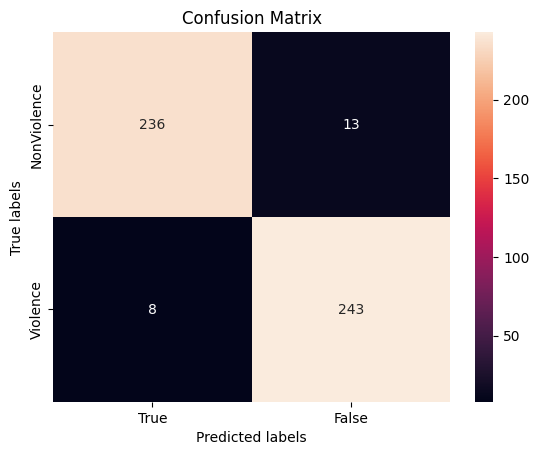

In [28]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm=confusion_matrix(labels_test_normal, labels_predict)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['NonViolence', 'Violence']);

In [29]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(labels_test_normal,labels_predict)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       249
           1       0.95      0.97      0.96       251

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [30]:
def predict_frames(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 
                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
    predicted_class_name = ''
    while video_reader.isOpened():
 
        ok, frame = video_reader.read() 
        
        if not ok:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)
        if len(frames_queue) == SEQUENCE_LENGTH:                        
            predicted_labels_probabilities = yolo_fusion.predict(np.expand_dims(frames_queue, axis = 0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]
        if predicted_class_name == "Violence":
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 12)
        else:
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 12)
        video_writer.write(frame)                       
        
    video_reader.release()
    video_writer.release()

In [31]:
plt.style.use("default")
def show_pred_frames(pred_video_path): 
    plt.figure(figsize=(20,20))
    video_reader = cv2.VideoCapture(pred_video_path)
    # Get the number of frames in the video.
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    # Get Random Frames from the video then Sort it
    random_range = sorted(random.sample(range (SEQUENCE_LENGTH , frames_count ), 12))
    for counter, random_index in enumerate(random_range, 1):
        plt.subplot(5, 4, counter)
        # Set the current frame position of the video.  
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_index)          
        ok, frame = video_reader.read() 
        if not ok:
            break 
        frame = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
        plt.imshow(frame);ax.figure.set_size_inches(20,20);plt.tight_layout()
                            
    video_reader.release()

In [32]:
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
output_video_file_path = f'{test_videos_directory}/Output-Test-Video.mp4'

1/1 [==============================] - 0s 28ms/step


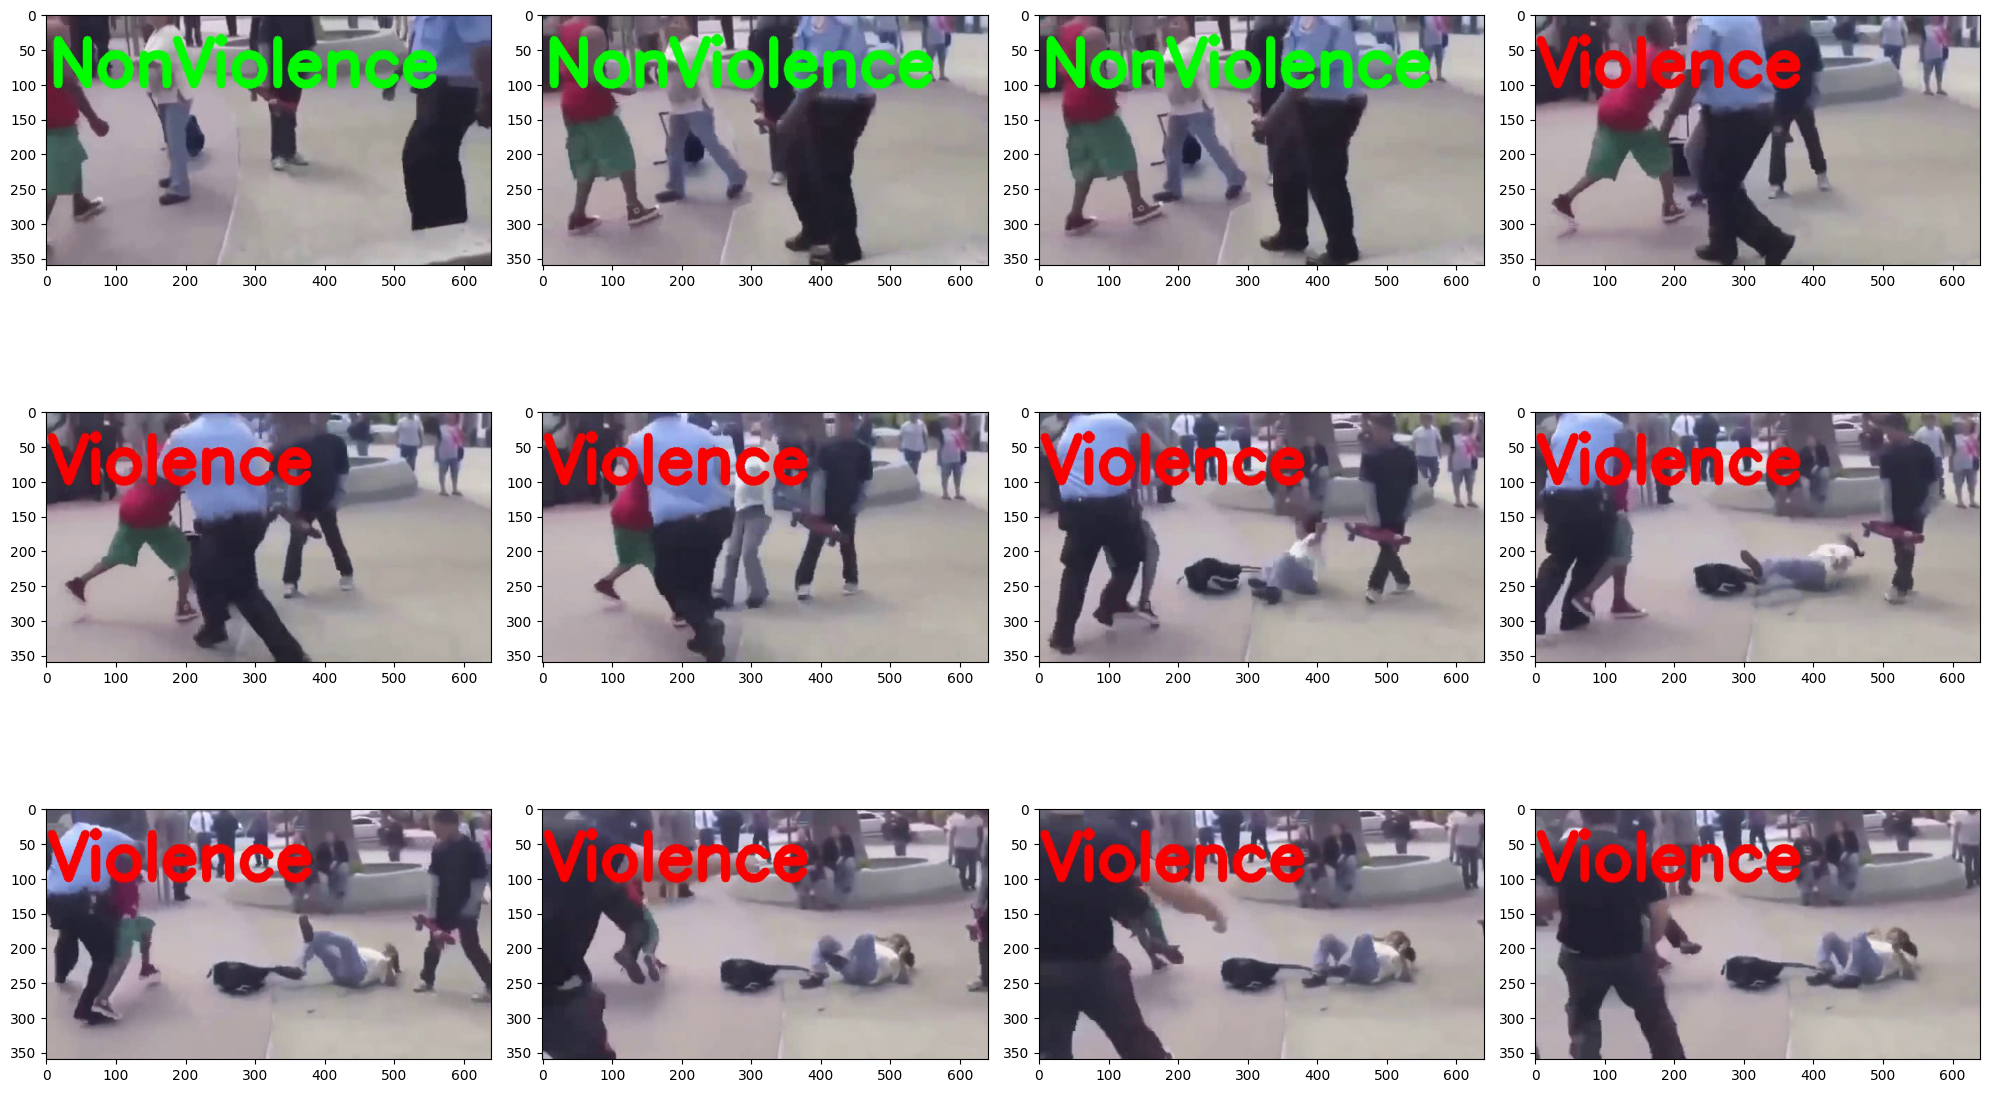

In [33]:
input_video_file_path = "/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/V_101.mp4"
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
show_pred_frames(output_video_file_path)